<a href="https://colab.research.google.com/github/CaroSerrano/FundamentosDeLaCienciaDeDatos/blob/main/vivoLimpieza_de_datos_con_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Limpiando y preparando de datos con Pandas
La limpieza de datos es una tarea crucial en el proceso de análisis. Si los datos no están limpios, los resultados del análisis pueden ser inexactos y llevar a decisiones equivocadas.

Pasos para la limpieza de datos:
* Identificar y eliminar valores atípicos o valores faltantes
* Eliminar datos duplicados, no útiles o redundantes
* Convertir los datos en el formato adecuado
* Normalizar los datos (1)
* Verificar la consistencia de los datos (2)
* Verificar la validez de los datos


(1) La normalización de datos es un proceso de organización y estructuración de una base de datos para reducir la redundancia de datos. Este proceso es una forma de asegurarse de que cada campo y registro esté organizado de forma lógica, de modo que no sólo se evita la redundancia, sino que también se hace más eficiente el uso de cualquier base de datos relacional: se evita cualquier error de entrada de datos, el borrado accidental y también se facilita el proceso de actualización de los datos.

(2) La consistencia de los datos significa que los datos en todas las bases de datos que tenemos a disposición están sincronizados entre sí en las diversas fuentes a las que se acude. Si los datos se replican en varias fuentes, deben ser coherentes en todas las instancias

###Ejemplos de algunas prácticas comunes
* Conversión de formatos de fecha:  
  `df['column'] = pd.to_datetime(df['column'], format ='%d/%m/%Y')`
* Conversión de cadenas de texto a datos numéricos:   
  `df['column'] = pd.to_numeric(df['column'], errors = 'coerce')`
* Conversión a str:  
`df['column'] = df['column'].astype(str)`
* Eliminar espacios al principio y al final de un string:   
  `df['column'] = df['column'].str.strip()`
* Llenado de faltantes:   
  `df['column'] = df['column'].fillna(df['column'].mean(), inplace = True)`  
  `df['column'] = df['column'].fillna()`
* Eliminar filas que no tengan un valor:   
  `df = df.dropna(subset=["column"]) # elimina las filas que no tienen los valores de la columna indicada`   
  `df = df.dropna() # elimina las filas a las que le falta algún valor`  
  `df = df.dropna(how='all') # elimina las filas con todos los valores faltantes`   
  `df = df.dropna(thresh=2) # elimina las filas con 2 o más valores faltantes`
* Reemplazar/Eliminar caracteres:   
  `df['column'] = df['column'].str.replace('valor_actual_1','valor_nuevo_1').str.replace('valor_actual_2','valor_nuevo_2')`  
  `df['column'] = df['column'].str.replace('caracter_actual_1','caracter_nuevo_1').str.replace('caracter_actual_2','caracter_actual_2')`
* Eliminar columnas innecesarias o redundantes:  
  `df = df.drop(columns = ['column_1', 'column_2'], inplace = True)`  
  `df = df.drop(['column'], axis = 1)`
* Eliminar filas por índice:   
  `df = df.drop(index=('index_1', 'index_1'))`
* Eliminar filas  y columnas innecesarias:  
  `df = df.drop(index='index', columns='column')`
* Extraer una columna para poder utilizarla después:  
  `serie_column = df.pop('column')`
* Agregar una columna por indexación:   
  `df2 = df.join('column')`
* Renombrar columnas:   
  `df = df.rename(columns={'column_actual_1':'column_nueva_1'})`
* Duplicados contarlos:   
  `df.duplicated().sum()`   
* Duplicados mostrarlos:   
  `df[df.duplicated(kepp='First'/'last'/False)]`
* Duplicados borrarlos:   
  `df.drop_duplicates()`
* Controles:
  `.isnull()`
  `.notnull()`
  `.isna()`
  `.notna()`
* Slice por indices de números:   
  `.iloc[]`
* Slice por indices de texto (si hubiese):   
  `.loc[]`




# Recordatorio métodos pandas

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import display as ds

* Creando dataframe ejemplos a partir de un arreglo numpy  
`df= pd.DataFrame(data=array_numpy, index=array_numpy, columns=array_numpy)`

In [2]:
datos = np.array([['','Nombre','Apellido','Tel', 'DNI'],['Administrador','Armando','Gómez', '2536-5225','23547852'],['Ayudante','Raúl','Martínez',['3025-6458', '3025-4584'],'32568456'], ['Visitante','Josefina','Alvarez', '2856-9874','35821454']], dtype=object)
df_nparray = pd.DataFrame(data=datos[1:,1:], columns=datos[0,1:], index=datos[1:,0])
df_nparray

,Nombre,Apellido,Tel,DNI
Administrador,Armando,Gómez,2536-5225,23547852
Ayudante,Raúl,Martínez,"[3025-6458, 3025-4584]",32568456
Visitante,Josefina,Alvarez,2856-9874,35821454


* Creando dataframe ejemplos a partir de un diccionario
`df= pd.DataFrame(data=dict_py)`

In [3]:
correos_dict = {'DNI': [ '32568456','23547852', '35821454'],'email': [ 'rmarti1969@yahoo.com','agomez@gmail.com', 'joa@outlook.com']}
df_dictpy = pd.DataFrame(correos_dict)
df_dictpy

,DNI,email
0,32568456,rmarti1969@yahoo.com
1,23547852,agomez@gmail.com
2,35821454,joa@outlook.com


* Agregado de nuevas columnas al Dataframe utilizando una función que busca correspondencias entre dos elementos y apunta a su valor: `map()`

In [4]:
residencia_dict = {'35821454':'Unquillo', '23547852':'Rosario', '32568456':'Trenque Launquen'}
df_nparray['ciudad'] = df_nparray.DNI.map(residencia_dict)
df_nparray

,Nombre,Apellido,Tel,DNI,ciudad
Administrador,Armando,Gómez,2536-5225,23547852,Rosario
Ayudante,Raúl,Martínez,"[3025-6458, 3025-4584]",32568456,Trenque Launquen
Visitante,Josefina,Alvarez,2856-9874,35821454,Unquillo


* Denormalización (Expansión de columna) un dataframe a partir de los valores de una columna:  
  `df = df.explode('Column', ignore_index =True/False)`

In [5]:
df_explode = df_nparray.explode('Tel')
df_explode

,Nombre,Apellido,Tel,DNI,ciudad
Administrador,Armando,Gómez,2536-5225,23547852,Rosario
Ayudante,Raúl,Martínez,3025-6458,32568456,Trenque Launquen
Ayudante,Raúl,Martínez,3025-4584,32568456,Trenque Launquen
Visitante,Josefina,Alvarez,2856-9874,35821454,Unquillo


* Unión de dos DataFrames (merge):  
  `df3 = df1.merge(df2, on='column_PK', how='inner')`

* Unión de dos DataFrames (concat):  
  `df3 = pd.concat([df1,df2], axis='column/row', join='inner')`

Expresiones lambda
Permiten realizar operaciones sencillas sin necesidad de crear una función

Funciones de orden superior, que itera sobre cada elemento de un arreglo:
* filter() [obtiene menos elementos que el principal]  
`filter(function, iterable)`  
* map() [obtiene la misma cantidad de elementos]  
`map(function, iterable)`
* reduce() [obtiene un único valor que es calculado por iteraciones de pares comenzando por el primer par y ese valor contra el elemento siguiente]  
```
from functools import reduce  
reduce(function, iterables)
```

# Actividad
Conectarse

In [6]:
df_fifa = pd.read_csv('/content/fifa21 raw data v2.csv',low_memory=False)
df_fifa.describe()

FileNotFoundError: [Errno 2] No such file or directory: '/content/fifa21 raw data v2.csv'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# df_fifav2 = pd.read_csv('/content/drive/MyDrive/1-2024/Fundamentos/24304/1vivosPython/Archivos/fifa21 raw data v2.csv', low_memory=False)

In [ ]:
# df_fifav2


Exploratorios

In [ ]:
# df_convertions = pd.read_html('https://coastsupply.co/help/products/feet-to-centimeters-ft-to-cm-conversion/')
# df_convertions[0]
df_fifa.Height.unique()

Eliminar columnas que no se usaran

In [ ]:
df_fifav3 = df_fifa.drop(columns= ['Name', 'photoUrl', 'playerUrl'])
df_fifav3.info()

Limpiar columnas con incoherencia de datos

In [ ]:
df_fifav3['Club'] = df_fifav3['Club'].str.strip('\n')
df_fifav3

Eliminar duplicados


In [ ]:
df_fifav3.duplicated().sum()

In [ ]:
df_fifav3.ID.duplicated().sum()

Conversión de unidades e incoherencia de datos



Acá intenté hacer uso de la tabla del html para convertir las unidades pero no me salió

In [ ]:
# df_convertions = pd.read_html('https://coastsupply.co/help/products/feet-to-centimeters-ft-to-cm-conversion/')


# df_convertions = pd.DataFrame(df_convertions[0])
# nombres_columnas = df_convertions.iloc[0]
# nombres_columnas


In [ ]:
# df_convertions = df_convertions[1:]

# df_convertions = df_convertions.set_axis(nombres_columnas, axis=1)
# df_convertions.reset_index(drop=True, inplace=True)
# df_convertions.head()
# df_convertions.info()

## **\Pasar las alturas que están en pies y pulgadas a centímetros**

In [ ]:
df_fifav3['Height'] = df_fifav3['Height'].str.replace('cm', '')
df_fifav3.Height.unique()

In [ ]:
df_fifav3['Height'] = df_fifav3['Height'].str.replace('"', '')
df_fifav3.Height.unique()

In [ ]:
def pies_a_cm(valor):
    pies, pulgadas = map(int, valor.split("'"))
    altura_cm = pies * 30.48 + pulgadas * 2.54
    return altura_cm

for indice, valor in df_fifav3['Height'].items():
    if '\'' in valor:
        df_fifav3.at[indice, 'Height'] = pies_a_cm(valor)

In [ ]:
df_fifav3['Height'] = pd.to_numeric(df_fifav3['Height'])
df_fifav3.Height.unique()

In [ ]:
df_fifav3 = df_fifav3.rename(columns={'Height': 'Height_cm'})

Faltaría trabajar los datos faltantes

In [ ]:
df_fifav3['Height_cm'].fillna(0, inplace=True)

In [ ]:
df_fifav3.describe(include='all')


In [ ]:
df_fifav3.shape


In [ ]:
df_fifav3 = df_fifav3.dropna(subset=['ID'])

In [ ]:
df_fifav3['ID'] = pd.to_numeric(df_fifav3['ID'], errors='coerce')
mask = df_fifav3['ID'].apply(lambda x: isinstance(x, int))

In [ ]:
df_fifav3_filtrado = df_fifav3[mask]
df_fifav3_filtrado.describe()

In [ ]:
df_fifav3_filtrado.shape

In [ ]:
df_fifav3_filtrado.Weight.unique()

In [ ]:
df_fifav3_filtrado['Weight'] = df_fifav3_filtrado['Weight'].str.replace('kg', '')
df_fifav3_filtrado.Weight.unique()

In [ ]:
def libras_a_kg(valor):
    libras = int(valor.rstrip('lbs'))
    peso_kg = libras * 0.4535924
    return peso_kg

for indice, valor in df_fifav3_filtrado['Weight'].items():
    if 'lbs' in valor:
        df_fifav3_filtrado.at[indice, 'Weight'] = libras_a_kg(valor)
df_fifav3_filtrado.Weight.unique()


In [ ]:
df_fifav3_filtrado['Weight'] = df_fifav3_filtrado['Weight'].astype(str)
df_fifav3_filtrado.Weight.unique()

In [ ]:
df_fifav3_filtrado = df_fifav3_filtrado.rename(columns={'Weight': 'Weight_kg'})

In [ ]:
df_fifav3_filtrado[['Contract_from', 'Contract_to']]= df_fifav3_filtrado.Contract.str.split(pat='~', expand=True)
df_fifav3_filtrado.drop(columns='Contract', inplace=True)
df_fifav3_filtrado

In [ ]:
df_fifav3_filtrado.info()

# Plotly



---


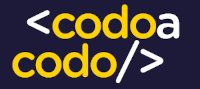

**Todos los derechos son reservados por el Programa Codo a
Codo perteneciente a la Subsecretaría Agencia de Aprendizaje
a lo largo de la vida del Ministerio de Educación del Gobierno
de la Ciudad Autónoma de Buenos Aires.
Se encuentra prohibida su venta o comercialización.**